In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zoo = pd.read_csv("C:\\Users\\HEMANJALI MULI\\Downloads\KNN\\KNN\\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [4]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# Data Visualization

<Axes: >

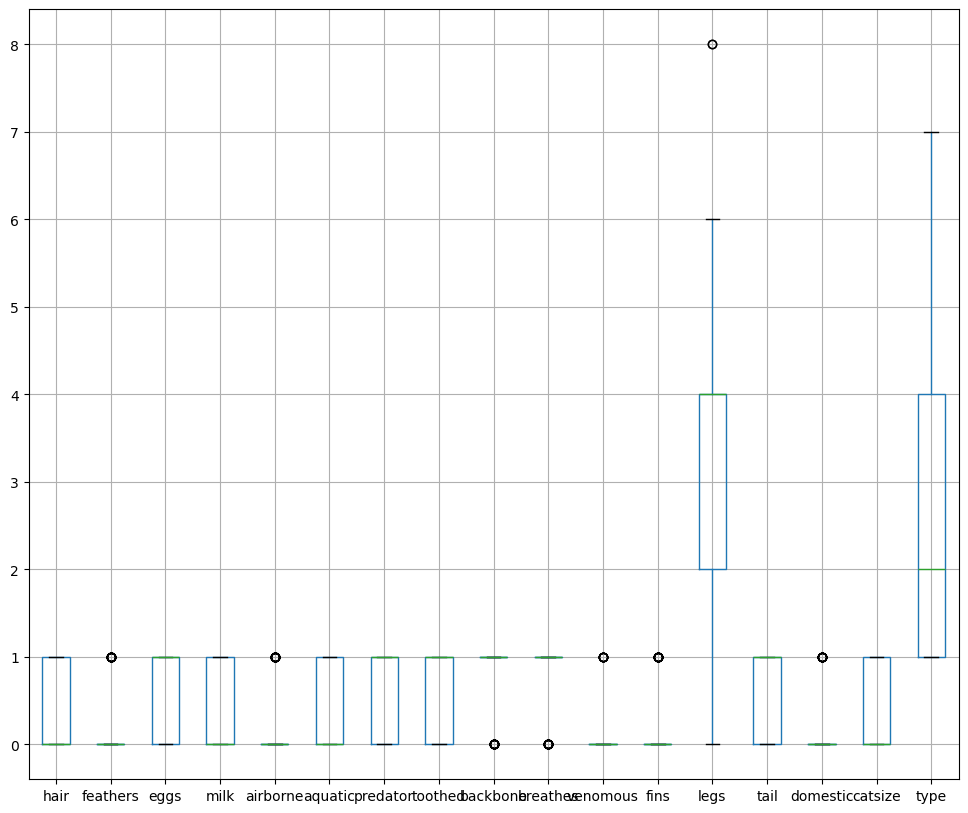

In [7]:
zoo.boxplot(figsize=(12, 10))

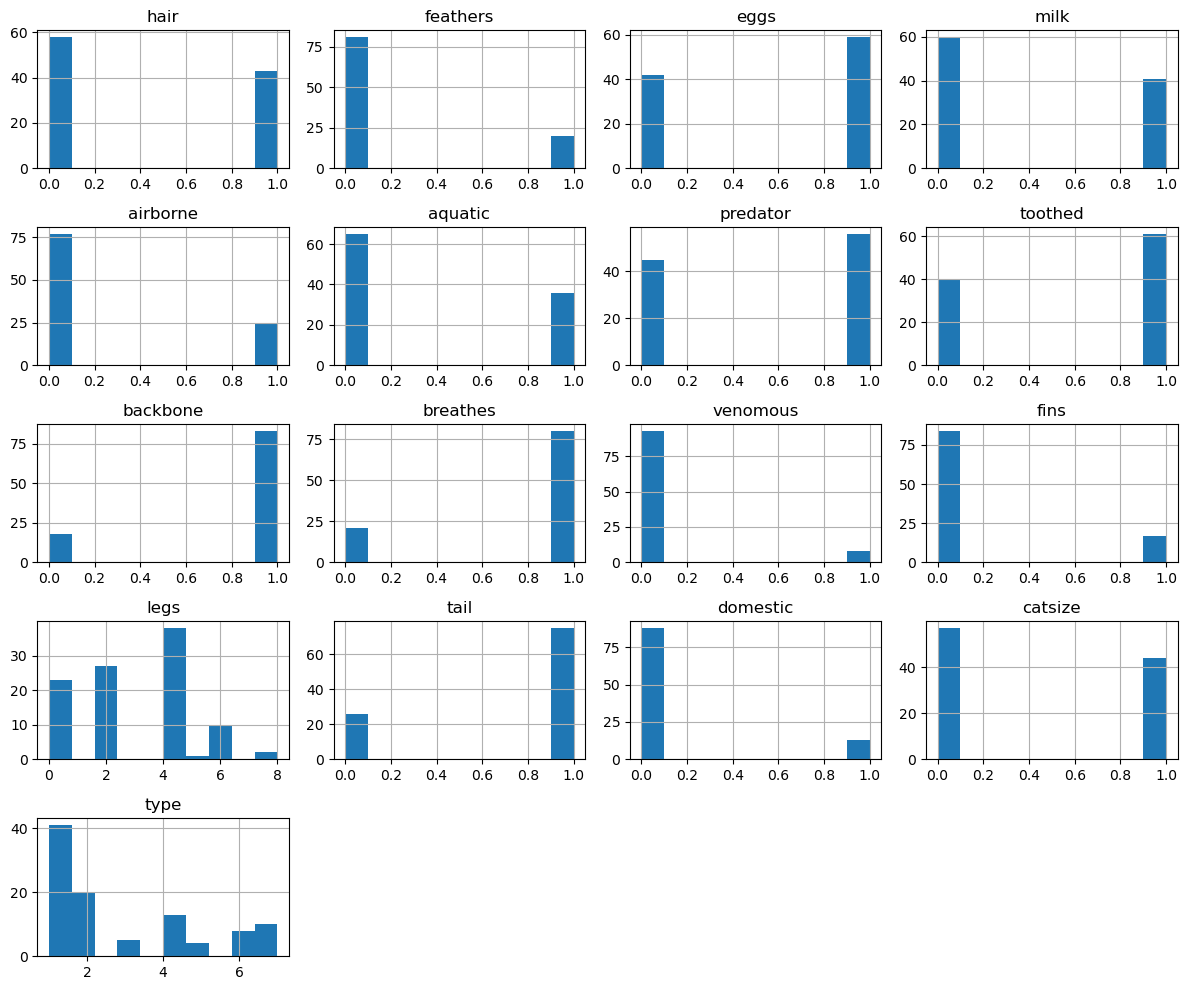

In [8]:
zoo.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [9]:
zoo=zoo.drop('animal name', axis=1)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
from matplotlib import pyplot as plt
zoo['hair'].plot(kind='hist', bins=20, title='hair')
plt.gca().spines[['top', 'right',]].set_visible(False)

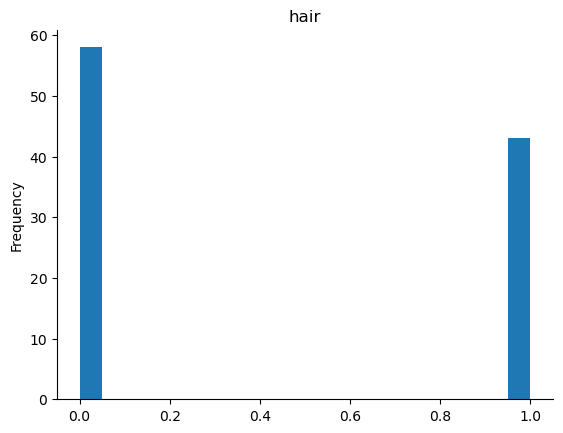

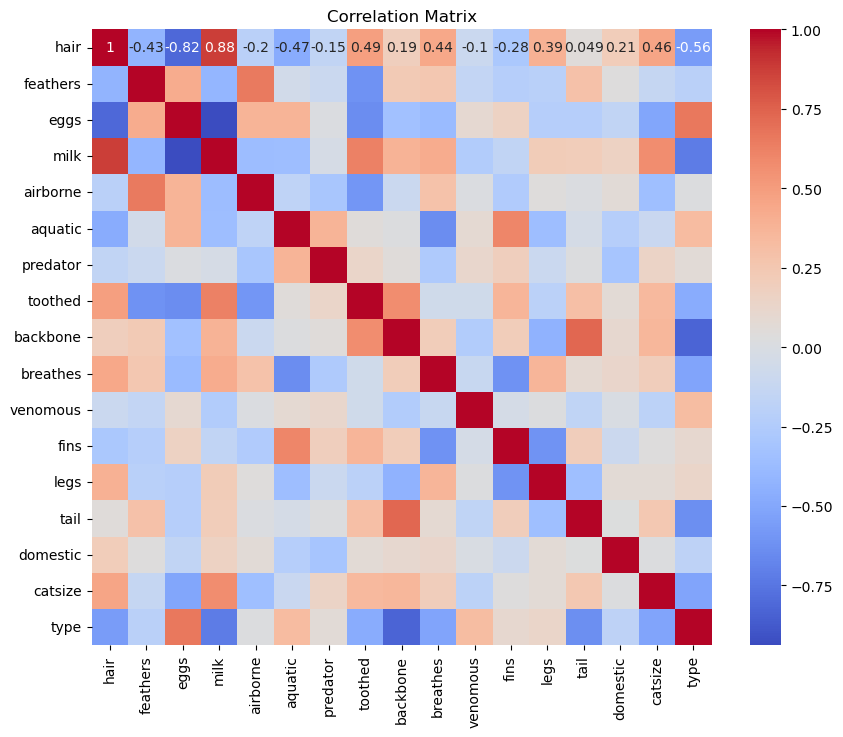

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(zoo.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

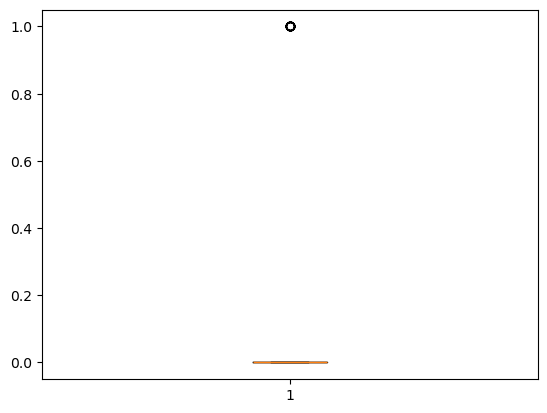

In [12]:
plt.boxplot(zoo["feathers"])
plt.show()

# K-Nearest Neighbours Algorithm 

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X = zoo.drop('type', axis=1)  # Features
Y = zoo['type']  # Target variable

In [15]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [16]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(80, 16) (21, 16) (80,) (21,)


In [18]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
preds

array([4, 1, 1, 6, 4, 2, 6, 1, 6, 4, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 6],
      dtype=int64)

# Classifier's Performance

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         3
           4       0.25      1.00      0.40         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         2

    accuracy                           0.76        21
   macro avg       0.46      0.67      0.51        21
weighted avg       0.68      0.76      0.70        21



In [22]:
np.mean(preds==y_test)

0.7619047619047619

# Grid Search for Algorithm Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# Visualizing the decision boundaries 

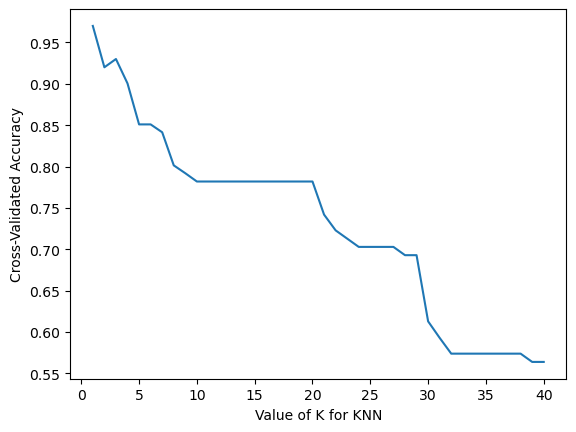

In [29]:
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Interview Questions

## 1. What are the key hyperparameters in K-Nearest Neighbors (KNN)?

### Key Hyperparameters in KNN:

### k (Number of Neighbors):
      Defines how many nearest neighbors will be considered for classifying or predicting a data point.e:

### Distance Metric:
      Defines how the distance between points is calculated, such as Euclidean, Manhattan, or Minkowski distance.

### Weights:
      Determines whether all neighbors contribute equally or whether closer neighbors have a greater influence. The common settings are:

### uniform:   
     All neighbors have equal weight..

### distance:   
     Neighbors are weighted by their distance (closer neighbors have more weight).
### Algorithm:  
    Specifies the algorithm used to compute nearest neighbors:tance.

auto: Automatically selects the best algorithm based on input data.
ball_tree: Uses a Ball Tree data structur.
. kd_tree: Uses a KD Tre
e. brute: Performs brute-force search.
### Leaf Size:
     In tree-based algorithms (ball_tree, kd_tree), it controls the number of points in the leaf nodes. Smaller values increase accuracy but decrease speed.
### p (Power Parameter for Minkowski Distance):
     When Minkowski distance is used, this parameter defines the power of the distance calculation. When p = 1, it is Manhattan distance; when p = 2, it is Euclidean distance.

## 2. What distance metrics can be used in KNN?

### Common Distance Metrics :### Euclidean Distance:      The most common metric, calculated as the straight-line distance between two points. It works well in low-dimensional spaces.### Manhattan Distance (L1 Distance):      Measures distance as the sum of absolute differences along each axis. Useful in grid-like spaces or when dimensionality is higher.### Minkowski Distance:    Generalization of both Euclidean and Manhattan distances, controlled by the parameter p. When p = 1, it becomes Manhattan; when p = 2, it becomes Euclidean.### Cosine Similarity:      Measures the cosine of the angle between two vectors rather than their distance. This is useful for high-dimensional spaces where magnitude does not matter as much as the orientation.### Hamming Distance:     Measures the number of positions at which the corresponding values are different. It is used for categorical variables and binary feature spaces.